6 questions :

1 -Comment la positivité émotionnelle varie-t-elle selon les genres ?
    Colonnes : playlist_genre, track_valence
    Moyenne de track_valence par genre.
2- Quelle est la relation entre la popularité et la durée des chansons ?
    Colonnes : track_popularity, track_duration_ms
    Conversion en minutes et création d’un scatter plot.
3- Quels sont les mois avec le plus de sorties de chansons ?
    Colonnes : track_album_release_date
    Extraction du mois à partir de track_album_release_date et comptage des occurrences.
4- Quels sont les genres les plus dansants ?
    Colonnes : playlist_genre, track_danceability
    Moyenne de track_danceability par genre.
5- Comment la valence (positivité émotionnelle) varie-t-elle selon les genres ?
    Colonnes : playlist_genre, track_valence
    Moyenne de track_valence par genre.
6- Quelle est la distribution des tempos des chansons ?
    Colonnes : tempo
    Histogramme des valeurs de track_tempo.
7- Comment la popularité moyenne des chansons a-t-elle évolué dans le temps ?
    Colonnes : track_album_release_date, track_popularity
    Agrégation de la moyenne de track_popularity par année.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "./dataset/spotify_songs.csv"
df = pd.read_csv(file_path)


In [8]:
# Convertir les donnees pour les dataviz
df["track_duration_min"] = df["duration_ms"] / 60000
df["track_album_release_date"] = pd.to_datetime(df["track_album_release_date"], errors="coerce")
df["release_month"] = df["track_album_release_date"].dt.month

In [5]:
figures = {}

C:\Users\moham\AppData\Local\Temp\ipykernel_38280\2051973136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valence_by_genre.index, y=valence_by_genre.values, palette="coolwarm")


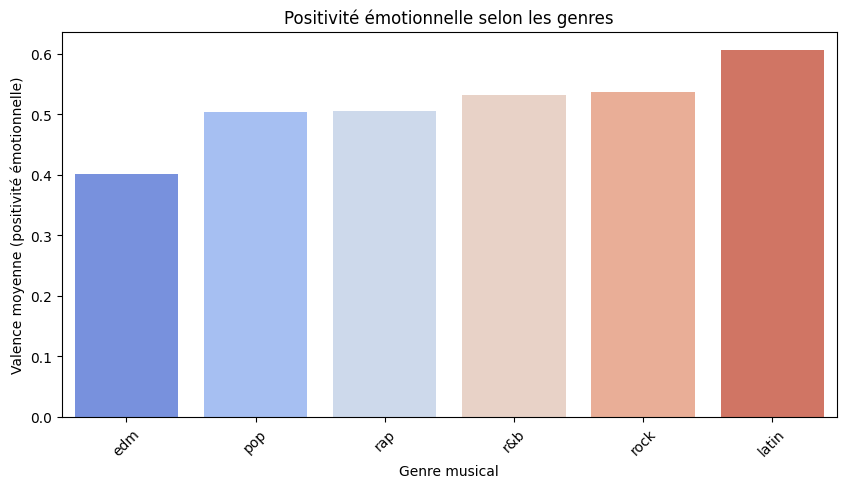

In [ ]:
# 1. Positivité émotionnelle selon les genres 
valence_by_genre = df.groupby("playlist_genre")["valence"].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=valence_by_genre.index, y=valence_by_genre.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Genre musical")
plt.ylabel("Valence moyenne (positivité émotionnelle)")
plt.title("Positivité émotionnelle selon les genres")
figures["valence_by_genre"] = plt.gcf()

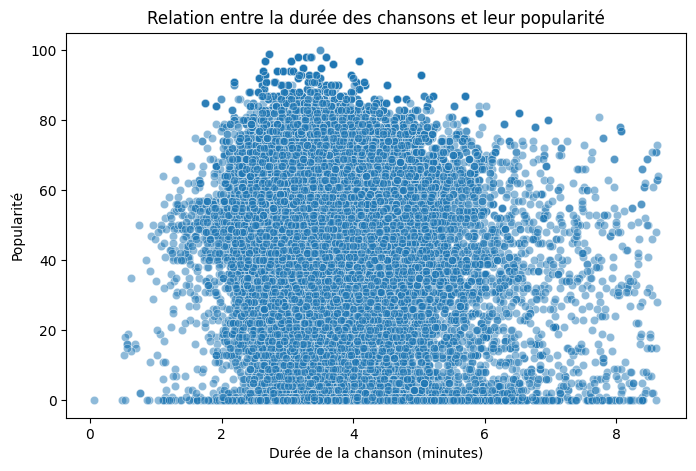

In [9]:
# 2. Relation entre popularité et durée des chansons (scatter plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["track_duration_min"], y=df["track_popularity"], alpha=0.5)
plt.xlabel("Durée de la chanson (minutes)")
plt.ylabel("Popularité")
plt.title("Relation entre la durée des chansons et leur popularité")
figures["popularity_vs_duration"] = plt.gcf()

C:\Users\moham\AppData\Local\Temp\ipykernel_38280\4172977690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")


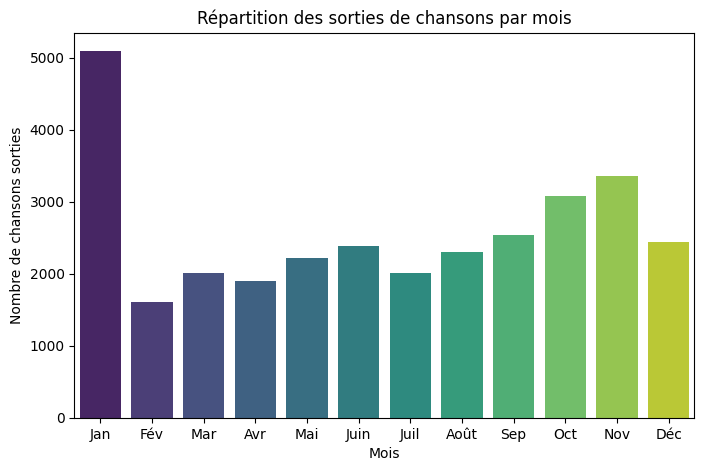

In [10]:
# 3. Nombre de sorties de chansons par mois
month_counts = df["release_month"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")
plt.xlabel("Mois")
plt.ylabel("Nombre de chansons sorties")
plt.title("Répartition des sorties de chansons par mois")
plt.xticks(range(0, 12), ["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sep", "Oct", "Nov", "Déc"])
figures["songs_per_month"] = plt.gcf()

C:\Users\moham\AppData\Local\Temp\ipykernel_38280\4211223322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=danceability_by_genre.index, y=danceability_by_genre.values, palette="magma")


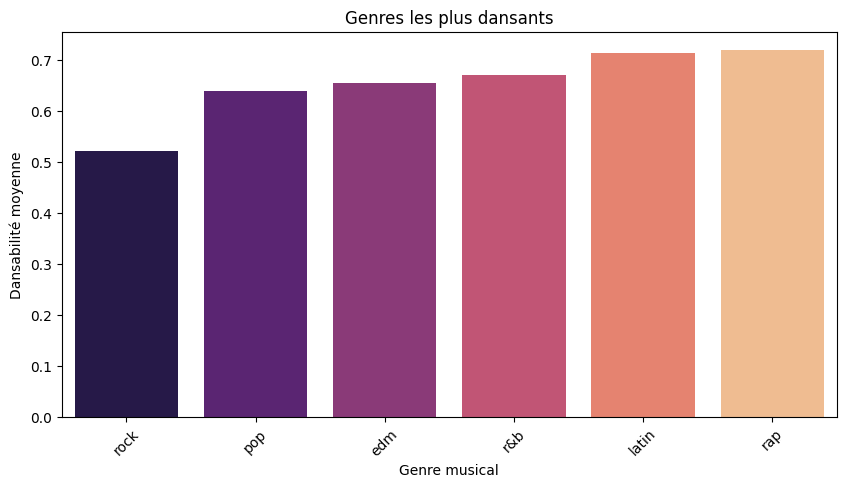

In [ ]:
# 4. Genres les plus dansants 
danceability_by_genre = df.groupby("playlist_genre")["danceability"].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=danceability_by_genre.index, y=danceability_by_genre.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Genre musical")
plt.ylabel("Dansabilité moyenne")
plt.title("Genres les plus dansants")
figures["danceability_by_genre"] = plt.gcf()

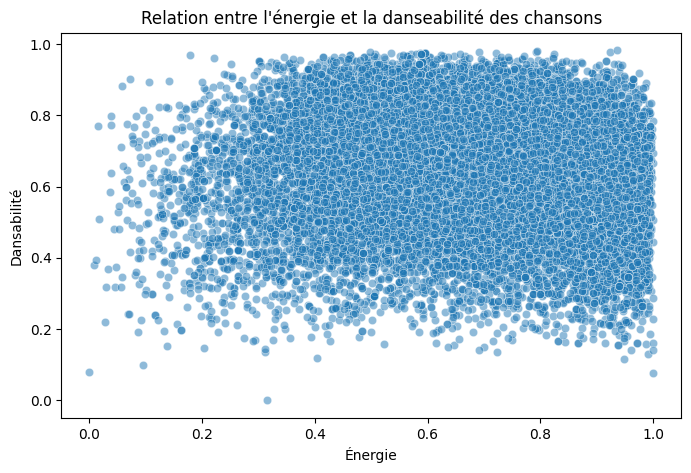

In [ ]:
# 5. Relation entre énergie et danseabilité
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["energy"], y=df["danceability"], alpha=0.5)
plt.xlabel("Énergie")
plt.ylabel("Dansabilité")
plt.title("Relation entre l'énergie et la danseabilité des chansons")
figures["energy_vs_danceability"] = plt.gcf()

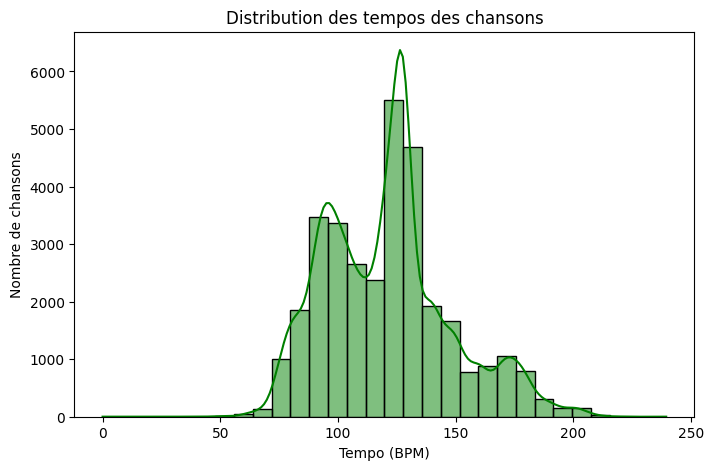

In [ ]:
#6.Distribution des tempos des chansons 
plt.figure(figsize=(8, 5))
sns.histplot(df["tempo"], bins=30, kde=True, color="green")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Nombre de chansons")
plt.title("Distribution des tempos des chansons")
figures["tempo_distribution"] = plt.gcf()

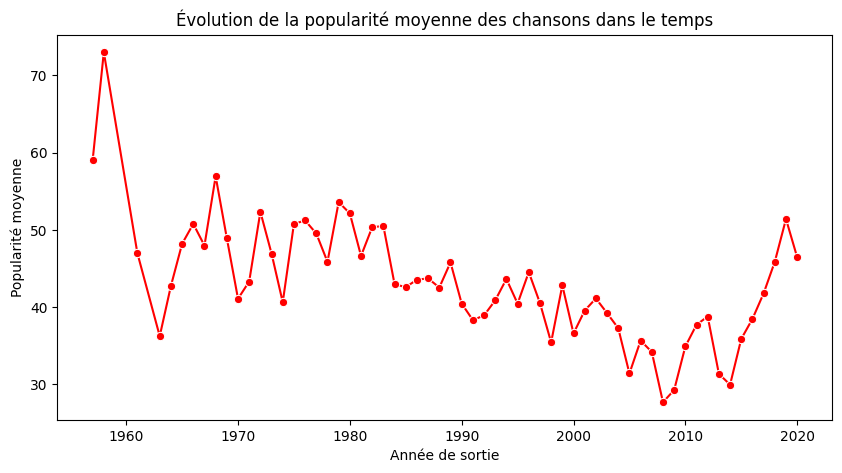

In [ ]:
7#  Évolution de la popularité moyenne des chansons dans le temps
df["track_album_release_year"] = df["track_album_release_date"].dt.year  
popularity_by_year = df.groupby("track_album_release_year")["track_popularity"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values, marker="o", color="red")
plt.xlabel("Année de sortie")
plt.ylabel("Popularité moyenne")
plt.title("Évolution de la popularité moyenne des chansons dans le temps")
figures["popularity_over_time"] = plt.gcf()